### Jakub Ochman    grupa 3.   AiR
#### Zadanie 1
Implementacja algorytmu G-TSP:

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

def G_TSP(graph, weights):
    sorted_edges = sorted(weights.items(), key=lambda item: item[1]) # sortowanie krawedzi po wagach
    Eo = dict() # Słownik:  wierzchołek początkowy -> wierzchołek końcowy krawędzi
    cost = 0 # koszt całkowity
    def is_cycle(u, v): # Funkcja sprawdzająca czy dodanie krawędzi (u, v) spowoduje podcykl
        node = v # wierzchołek końcowy
        goal = u # wierzchołek początkowy
        while node in Eo: # dopóki wierzchołek końcowy krawędzi jest w słowniku
            node = Eo[node] # wybieranie kolejnego wierzchołka z krawezi
            if node == goal: # jeśli istnieje inna ścieżka do docelowego wierzchołka
                return True # to znaczy, że dodanie krawędzi (u, v) spowoduje podcykl
        return False # W tym miejscu nie ma podcyklu
    
    for ((u, v), weight) in sorted_edges:   # dla każdej krawędzi (u, v) w posortowanej liście krawędzi
        if u in Eo.keys() or v in Eo.values(): # jeśli wierzchołek początkowy krawędzi jest już w słowniku 
            continue # lub wierzchołek końcowy krawędzi jest już w słowniku, to trzeba pominąć
        if len(Eo.keys()) < (len(graph.keys()) -1): # jeśli to ostatnia krawędź, to może być cykl
            if is_cycle(u, v): # sprawdzanie czy dodanie krawędzi (u, v) spowoduje podcykl
                continue # jeśli tak, to pomijanie krawędzi
        Eo[u] = v # dodawanie krawędzi (u, v) do słownika
        cost += weight # dodawanie wagi krawędzi do kosztu całkowitego
    path = list() # lista wierzchołków w ścieżce
    if len(Eo) < len(graph): # nie odwiedzono wszystkich wierzchołków
        return None, 0  # czyli nie rozwiązano problemu
    node = sorted_edges[0][0][0] # pierwszy wierzchołek z listy posortowanych krawedzi
    path.append(node) # dodawanie wierzchołka początkowego do listy wierzchołków w ścieżce
    while len(path) < len(Eo.keys()): # dopóki liczba wierzchołków w ścieżce jest mniejsza niż liczba krawędzi w słowniku
        if node not in Eo: # jeśli wierzchołek początkowy krawędzi nie jest w słowniku
            return None, 0 # To algorytm zawiódł
        path.append(Eo[node]) # dodawanie wierzchołka do wyznaczonej ścieżki
        node = Eo[node]  # wybieranie kolejnego wierzchołka na podstawie krawędzi
    return path, cost # zwracanie ścieżki i kosztu

Graf przechowywany jest w formie słownika krawędź -> lista sąsiedztwa. Wagi krawędzi przechowywane są w formie słownika (wierzchołek1, wierzchołek2) -> waga. W celu poprawnego uruchomienia algorytmu dla grafu nieskierowanego, należy zadeklarować krawędzie również w drugą stronę ( (wierzchołek2, wierzchołek1) -> waga. ). W tym celu zdefiniowano funkcję pomocniczą, tworzącą nowy słownik krawędzi. W celu wykreślenia grafu oraz ścieżki komiwojażera wykorzystano bibliotekę NetworkX wraz z pomocniczą funckcją. Niestety biblioteka ma problem z krawędziami zapisanymi w 'obie strony'. Z tego powodu najpierw zadeklarowano krawędzie w jedną stronę, zapamiętano, a nastepnie utworzono w drugą. W ten sposób algorytm działa poprawnie.

In [10]:
def make_undirected(edges):
    undirected = {}
    for (u, v), w in edges.items():
        if (v, u) not in edges:
            undirected[(u, v)] = w
            undirected[(v, u)] = w
        else:
            w_min = min(w, edges[(v, u)])
            undirected[(u, v)] = w_min
            undirected[(v, u)] = w_min
    return undirected

def print_graph(graph, weights=None, path=None):
    G = nx.Graph()
    
    for key, items in graph.items():
        for item in items:
            G.add_edge(key, item)
    
    plt.figure(figsize=(7, 7))
    
    pos = nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=14)
    
    if weights:
        edge_labels = {(u, v): weights.get((u, v), weights.get((v, u), "")) for u, v in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_color='blue')
    
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        path_edges += [(path[-1], path[0])]
        G_path = nx.Graph()
        G_path.add_edges_from(path_edges)
        nx.draw(G_path, pos, with_labels=True, node_color='red', edge_color='red', node_size=500, font_size=14, width=2)
    
    plt.show()


Przykładowy graf pełny z 10 krawędziami:

[0, 6, 5, 1, 8, 7, 9, 4, 2, 3]
koszt: 132


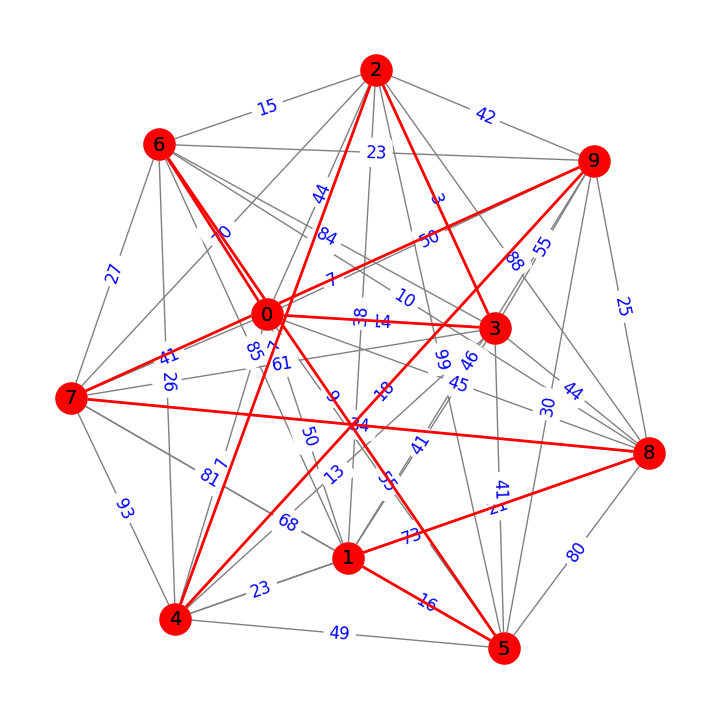

In [11]:
n = 10
graph = {i: [j for j in range(n) if j != i] for i in range(n)}

edges = {}

for u in graph:
    for v in graph[u]:
        edge = tuple(sorted((u, v)))
        if edge not in edges:
            edges[edge] = random.randint(1, 100)
edges_2 = make_undirected(edges)

(path, cost) = G_TSP(graph, edges_2)
print(path)
print(f"koszt: {cost}")


print_graph(graph, edges, path)

Jak widać algorytm odwiedził wszystkie krawędzie.

#### Zadanie 2
Niestety nie zawsze jest tak kolorowo. Algorym z pewnością zadziała dla grafu pełnego. Natomiast w przypadku grafów rzadszych nie musi zadziałać. Algorytm polega się na sortowaniu krawędzi po wagach, następnie wybieraniu krawędzi od tej z najmniejszą wagą. Kluczowe w tym algorytmie są kolejne warunki. Kolejno dobrane krawędzie nie mogą tworzyć podcyklu, a wierzchołki w tych krawędziach nie mogą mieć stopnia większego niż 2. Pierwszy warunek jest dość oczywisty, jedyny cykl jaki może wystąpić, to po odwiedzeniu wszystkich wierzchołków, z ostatniego do pierwszego. Natomiast drugi warunek oznacza, że z każdego wierzchołka mogą wychodzić maksymalnie dwie krawędzie. Niestety taki dobór wierzchołków w żaden sposób nie gwarantuje rozwiązania TSP. Przykładowo: tylko z dwóch wierzchołków grafu istnieją krawędzie do trzeciego, jednak obydwa są 'zajęte' poprzez inne krawędzie. W ten sposób trzeci wierzchołek nie zostanie odnaleziony, a TSP nie zostanie rozwiązany. 
Pomimo tego algorytm jest użyteczny. Algorytm jest szybki i łatwy do zaimplementowania. Dzięki temu jest jednym z pierwszych wyborów, gdy potrzeba rozwiązać TSP. Gdy wyniki nie są satysfakcjonujace lub algorytm nie znajdzie rozwiązania, stosuje się bardziej zaawansowane metody.

Poniżej przykład grafu, w którym istnieje rozwiązanie TSP, natomiast algorytm go nie wykrywa

None
koszt: 0


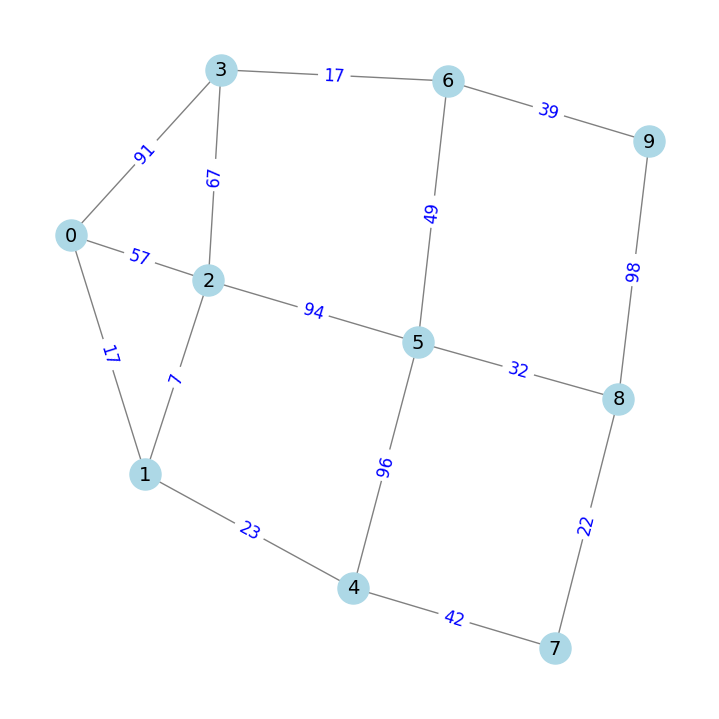

In [56]:
graph = {
    0: [1, 2, 3],
    1: [0, 2, 4],
    2: [0, 1, 3, 5],
    3: [0, 2, 6],
    4: [1, 5, 7],
    5: [2, 4, 6, 8],
    6: [3, 5, 9],
    7: [4, 8],
    8: [5, 7, 9],
    9: [6, 8]
}

edges = {}

for u in graph:
    for v in graph[u]:
        edge = tuple(sorted((u, v)))
        if edge not in edges:
            edges[edge] = random.randint(1, 100)
            
edges_2 = make_undirected(edges)

(path, cost) = G_TSP(graph, edges_2)
print(path)
print(f"koszt: {cost}")
print_graph(graph, edges)

Poniżej przedstawiono przykładowy graf nieskierowany niepełny, dla którego algorytm zadziałał i odwiedził wszystkie wierzchołki.

[2, 3, 0, 1, 5, 4, 8, 9, 7, 6]
koszt: 569


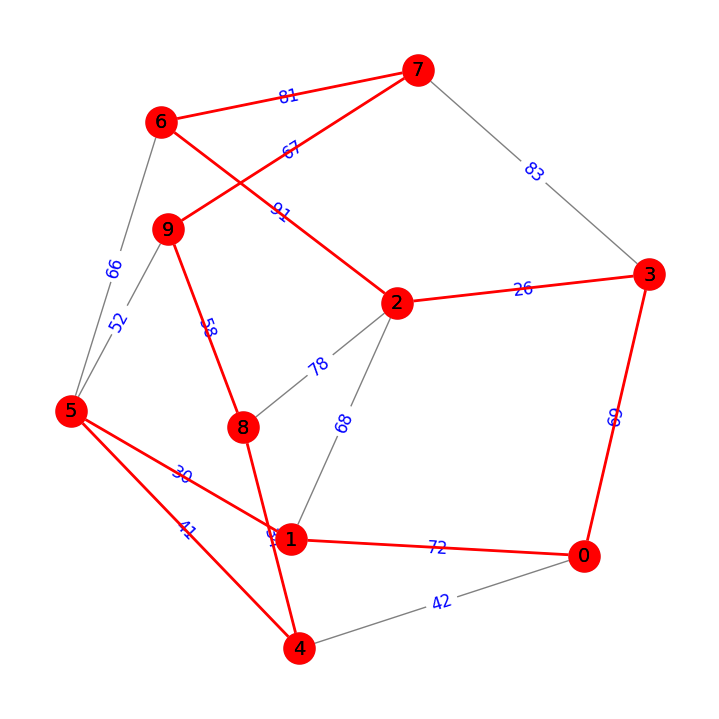

In [136]:
graph = {
    0: [1, 3, 4],
    1: [0, 2, 5],
    2: [1, 3, 6, 8],
    3: [0, 2, 7],
    4: [0, 5, 8],
    5: [1, 4, 6, 9],
    6: [2, 5, 7],
    7: [3, 6, 9],
    8: [2, 4, 9],
    9: [5, 7, 8]
}
edges = {}

for u in graph:
    for v in graph[u]:
        edge = tuple(sorted((u, v)))
        if edge not in edges:
            edges[edge] = random.randint(1, 100)
            
edges_2 = make_undirected(edges)

(path, cost) = G_TSP(graph, edges_2)
print(path)
print(f"koszt: {cost}")
print_graph(graph, edges, path)

Przykład dla grafu pełnego o 15 wierzchołkach

[2, 3, 5, 10, 11, 6, 12, 8, 13, 0, 9, 4, 1, 7, 14]
koszt: 379


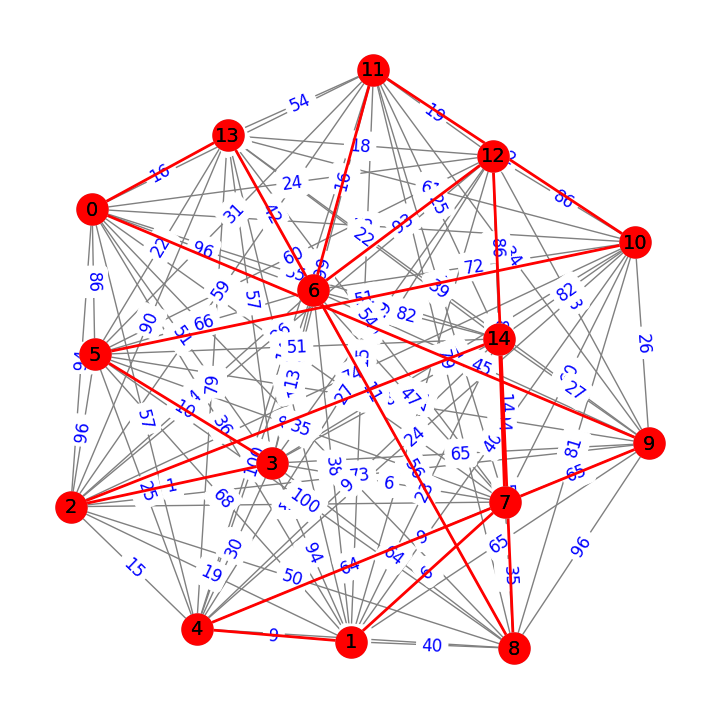

In [13]:
n = 15
graph = {i: [j for j in range(n) if j != i] for i in range(n)}

edges = {}

for u in graph:
    for v in graph[u]:
        edge = tuple(sorted((u, v)))
        if edge not in edges:
            edges[edge] = random.randint(1, 100)
            
edges_2 = make_undirected(edges)

(path, cost) = G_TSP(graph, edges_2)
print(path)
print(f"koszt: {cost}")
print_graph(graph, edges, path)

Przykład dla grafu pełnego o 100 wierzchołkach. Warto zaznaczyć, że przy obecnej implementacji, dla tak dużego grafu algorytm działał przez 2 sekundy. Znacznie dłużej, aż 12.7 sekundy trwało rysowanie tego grafu wraz z rozwiązaniem TSP.

[1, 27, 30, 39, 47, 98, 83, 49, 58, 73, 48, 42, 44, 41, 7, 33, 97, 59, 0, 6, 96, 53, 74, 75, 51, 76, 70, 93, 15, 60, 12, 62, 26, 91, 95, 19, 65, 9, 55, 14, 79, 54, 78, 20, 46, 52, 82, 13, 57, 63, 84, 94, 71, 92, 38, 50, 68, 34, 37, 10, 22, 4, 85, 25, 43, 77, 72, 66, 86, 17, 2, 36, 64, 11, 23, 87, 5, 61, 90, 35, 81, 80, 89, 99, 56, 21, 24, 40, 69, 16, 45, 28, 8, 67, 3, 18, 32, 31, 29, 88]
koszt: 505


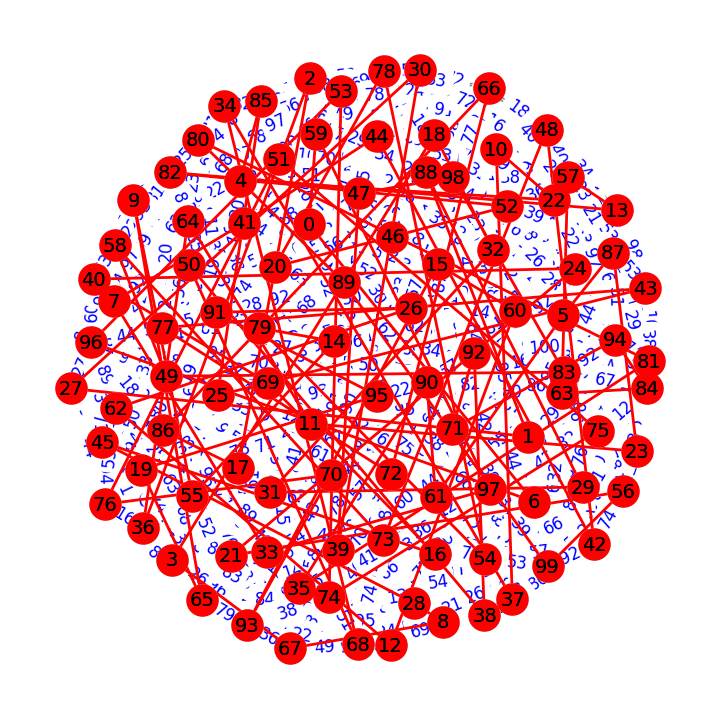

In [15]:
n = 100
graph = {i: [j for j in range(n) if j != i] for i in range(n)}

edges = {}

for u in graph:
    for v in graph[u]:
        edge = tuple(sorted((u, v)))
        if edge not in edges:
            edges[edge] = random.randint(1, 100)
            
edges_2 = make_undirected(edges)

(path, cost) = G_TSP(graph, edges_2)
print(path)
print(f"koszt: {cost}")
print_graph(graph, edges, path)

#### Zadanie 3
Złożoność obliczeniowa to w większości posortowanie krawędzi według wag, pozostała część algorytmu jest mniej złożona obliczeniowo. Algorytm jest jednym z łatwiejszych w implementacji i szybszych.
- Złożoność obliczeniowa kroku 1 – sortowanie: O(m*log m)
- Złożoność obliczeniowa kroku 2 – O(m)

Całościowa złożoność: O(m * (1 +log m) )

Algorytm traktuje problem bardziej jako budowę minimalnego drzewa rozpinającego z cyklem domykającym, niż jako ciągłe wybieranie kolejnego wierzchołka. Jest zachłanny globalnie, to znaczy, że przegląda wszystkie krawędzie w porządku wag. Nie zaczyna od konkretnego wierzchołka, działa bardziej "na krawędziach" niż "na wierzchołkach". Algorytm działa na tej samej zasadzie co algorytm Kruskala zaimplementowany przez w3schools. Jedyną różnicą jest warunek, że każdy wierzchołek musi być stopnia 2.

#### Źródła:
- Na podstawie materiałów z zajęć oraz wykładu
- Na podstawie zbliżonego w działaniu algorytmu  https://www.w3schools.com/dsa/dsa_algo_mst_kruskal.php
#### Środowisko:
Jupiter Notebook w Visual Studio Code z rozszerzeniem Jupiter, Python
